
Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4714  , p=0.4925  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=0.4725  , p=0.4918  , df=1
likelihood ratio test: chi2=0.4724  , p=0.4919  , df=1
parameter F test:         F=0.4714  , p=0.4925  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9836  , p=0.3742  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=1.9752  , p=0.3725  , df=2
likelihood ratio test: chi2=1.9736  , p=0.3728  , df=2
parameter F test:         F=0.9836  , p=0.3742  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4255  , p=0.2337  , df_denom=1235, df_num=3
ssr based chi2 test:   chi2=4.3007  , p=0.2308  , df=3
likelihood ratio test: chi2=4.2933  , p=0.2315  , df=3
parameter F test:         F=1.4255  , p=0.2337  , df_denom=1235, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.6393  , p=0.

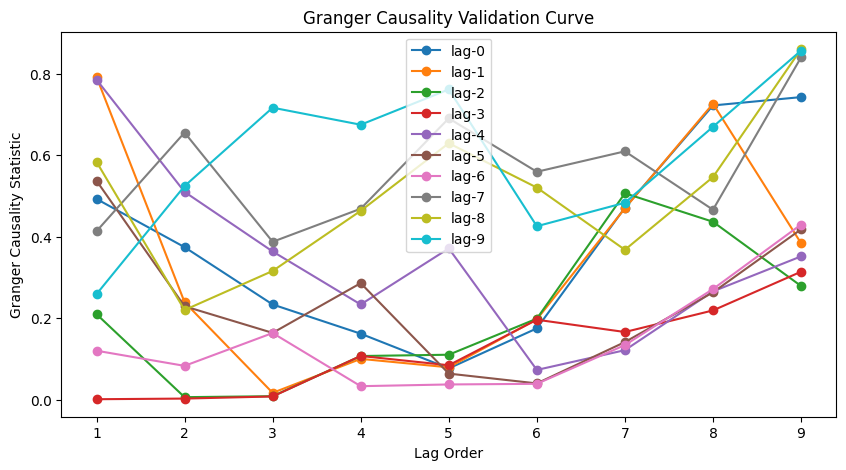

['pct_change', 'pct_change'] {0: 0.07688760551779979, 1: 0.016941483868494474, 2: 0.006356268639230048, 3: 0.0012968641512877146, 4: 0.07313319350629237, 5: 0.04008143958746501, 6: 0.03328282891579701, 7: 0.3873802109881466, 8: 0.2200878579717917, 9: 0.2590195058716042}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2968  , p=0.2550  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=1.2999  , p=0.2542  , df=1
likelihood ratio test: chi2=1.2992  , p=0.2544  , df=1
parameter F test:         F=1.2968  , p=0.2550  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1826  , p=0.3068  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=2.3747  , p=0.3050  , df=2
likelihood ratio test: chi2=2.3725  , p=0.3054  , df=2
parameter F test:         F=1.1826  , p=0.3068  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0581  , p=0.3659  , df_denom=1235, df_num=3
s

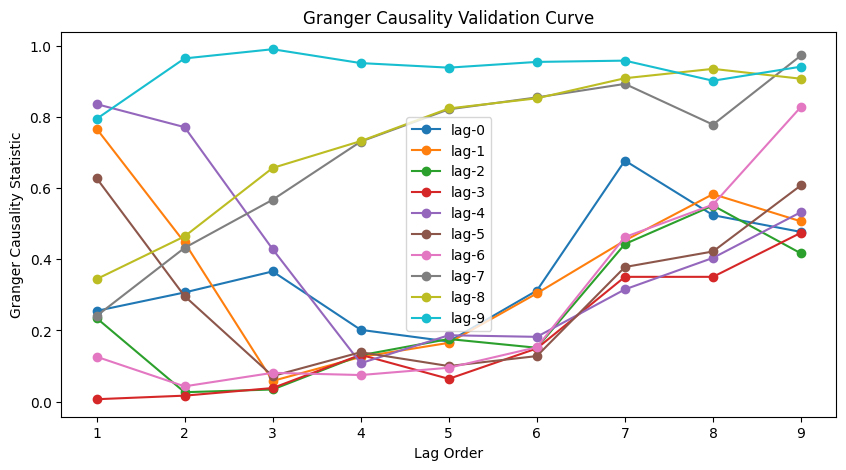

['pct_change', 'diff'] {0: 0.16903331284167886, 1: 0.05838812354736143, 2: 0.026643638754339786, 3: 0.00698372045062374, 4: 0.10807704765004379, 5: 0.07207144423222635, 6: 0.04314613634600829, 7: 0.2406814297312549, 8: 0.3441838473986555, 9: 0.7941276516282607}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3668  , p=0.5448  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=0.3677  , p=0.5442  , df=1
likelihood ratio test: chi2=0.3677  , p=0.5443  , df=1
parameter F test:         F=0.3668  , p=0.5448  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9748  , p=0.3776  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=1.9574  , p=0.3758  , df=2
likelihood ratio test: chi2=1.9558  , p=0.3761  , df=2
parameter F test:         F=0.9748  , p=0.3776  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6876  , p=0.1679  , df_denom=1235, df_num=3
ssr based 

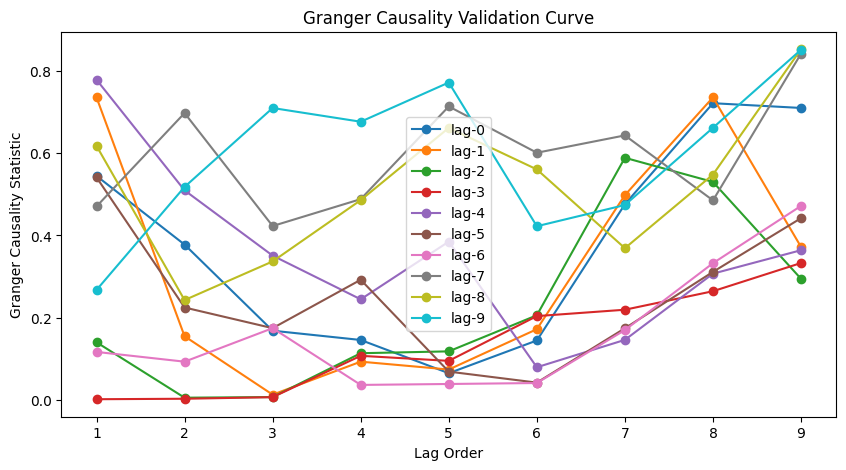

['pct_change', 'log_return'] {0: 0.06430898861396163, 1: 0.01207382349372544, 2: 0.00467964375604548, 3: 0.0009611264343999633, 4: 0.07879574949015972, 5: 0.041401104483176736, 6: 0.035795582143520986, 7: 0.42279902687437554, 8: 0.2424339689384695, 9: 0.2670818437382869}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1773  , p=0.6738  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=0.1778  , p=0.6733  , df=1
likelihood ratio test: chi2=0.1777  , p=0.6733  , df=1
parameter F test:         F=0.1773  , p=0.6738  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6149  , p=0.5409  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=1.2348  , p=0.5394  , df=2
likelihood ratio test: chi2=1.2342  , p=0.5395  , df=2
parameter F test:         F=0.6149  , p=0.5409  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1503  , p=0.3276  , df_denom=1235, df_num=3


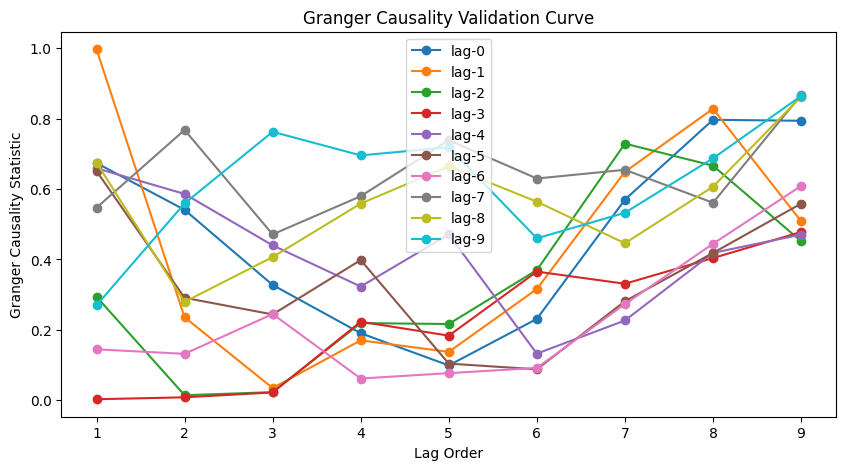

['diff', 'pct_change'] {0: 0.0992871434646788, 1: 0.03507641933876551, 2: 0.014626286085543713, 3: 0.0032810137480638545, 4: 0.1327242774981605, 5: 0.08820189821450204, 6: 0.06207000471675496, 7: 0.4711506820915956, 8: 0.2796455828432806, 9: 0.26999708494943936}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.8729  , p=0.3503  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=0.8750  , p=0.3496  , df=1
likelihood ratio test: chi2=0.8747  , p=0.3497  , df=1
parameter F test:         F=0.8729  , p=0.3503  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7570  , p=0.4693  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=1.5201  , p=0.4676  , df=2
likelihood ratio test: chi2=1.5192  , p=0.4679  , df=2
parameter F test:         F=0.7570  , p=0.4693  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8423  , p=0.4707  , df_denom=1235, df_num=3
ssr based

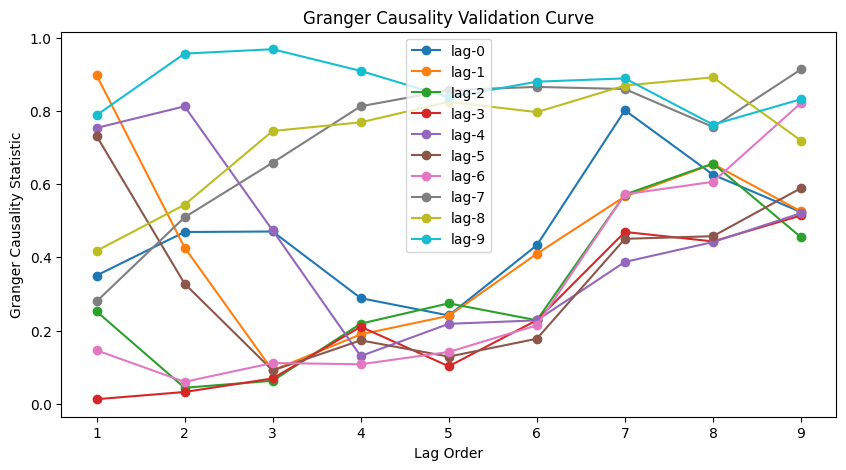

['diff', 'diff'] {0: 0.24114072174267434, 1: 0.09105177230647596, 2: 0.04345987446455155, 3: 0.012137370095062924, 4: 0.13012825726432584, 5: 0.09071458486811694, 6: 0.05964893489086381, 7: 0.27934525759682843, 8: 0.41766053748858134, 9: 0.762997796116475}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1127  , p=0.7372  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=0.1129  , p=0.7368  , df=1
likelihood ratio test: chi2=0.1129  , p=0.7368  , df=1
parameter F test:         F=0.1127  , p=0.7372  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5978  , p=0.5502  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=1.2003  , p=0.5487  , df=2
likelihood ratio test: chi2=1.1998  , p=0.5489  , df=2
parameter F test:         F=0.5978  , p=0.5502  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4207  , p=0.2351  , df_denom=1235, df_num=3
ssr based chi2 

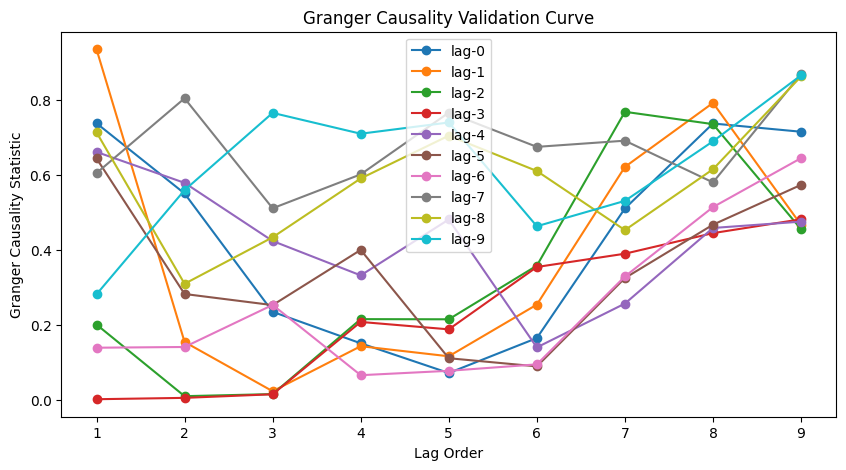

['diff', 'log_return'] {0: 0.07208321522153502, 1: 0.023529437545549228, 2: 0.010387706806069, 3: 0.002260952144245288, 4: 0.14024244052869944, 5: 0.08974124354417802, 6: 0.0662454438558712, 7: 0.510765250415897, 8: 0.3096689582896821, 9: 0.28164184273144627}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3726  , p=0.5417  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=0.3735  , p=0.5411  , df=1
likelihood ratio test: chi2=0.3735  , p=0.5411  , df=1
parameter F test:         F=0.3726  , p=0.5417  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8629  , p=0.4222  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=1.7328  , p=0.4205  , df=2
likelihood ratio test: chi2=1.7316  , p=0.4207  , df=2
parameter F test:         F=0.8629  , p=0.4222  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4116  , p=0.2378  , df_denom=1235, df_num=3
ssr based ch

C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['metrics_return'] = np.log(data['metrics']) - np.log(data['metrics'].shift(1))
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['value_return'] = data['value'].pct_change()
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4447  , p=0.5050  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=0.4458  , p=0.5044  , df=1
likelihood ratio test: chi2=0.4457  , p=0.5044  , df=1
parameter F test:         F=0.4447  , p=0.5050  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5022  , p=0.2231  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=3.0165  , p=0.2213  , df=2
likelihood ratio test: chi2=3.0128  , p=0.2217  , df=2
parameter F test:         F=1.5022  , p=0.2231  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6924  , p=0.1668  , df_denom=1235, df_num=3
ssr based chi2 test:   chi2=5.1059  , p=0.1642  , df=3
likelihood ratio test: chi2=5.0954  , p=0.1649  , df=3
parameter F test:         F=1.6924  , p=0.1668  , df_denom=1235, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.2459  , p=0.

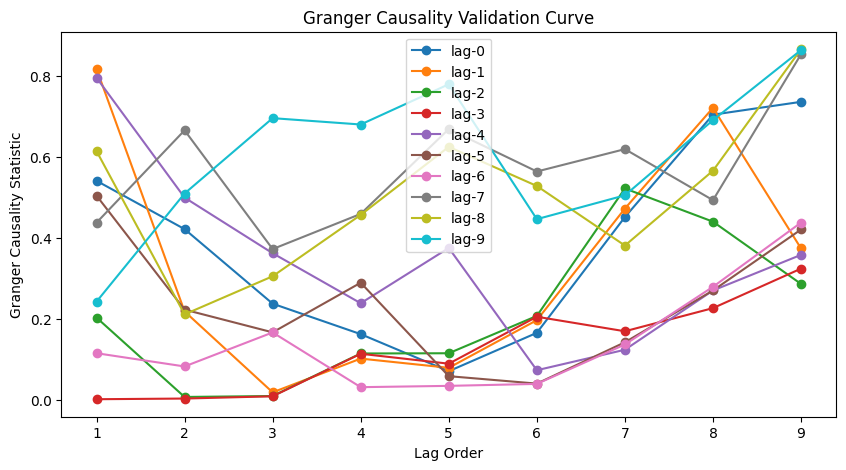

['log_return', 'pct_change'] {0: 0.07075380472828961, 1: 0.018466197026868032, 2: 0.00707532909233856, 3: 0.001466864874465999, 4: 0.0731638338311756, 5: 0.04007227728836493, 6: 0.03126905950481392, 7: 0.3727829705848759, 8: 0.21132804146079462, 9: 0.24270676589112355}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.1321  , p=0.2875  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=1.1348  , p=0.2867  , df=1
likelihood ratio test: chi2=1.1343  , p=0.2869  , df=1
parameter F test:         F=1.1321  , p=0.2875  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0572  , p=0.3478  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=2.1229  , p=0.3460  , df=2
likelihood ratio test: chi2=2.1211  , p=0.3463  , df=2
parameter F test:         F=1.0572  , p=0.3478  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.9652  , p=0.4084  , df_denom=1235, df_num=3
ss

C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['metrics_return'] = np.log(data['metrics']) - np.log(data['metrics'].shift(1))
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['value_return'] = data['value'].diff()
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

ssr based F test:         F=1.7629  , p=0.1339  , df_denom=1232, df_num=4
ssr based chi2 test:   chi2=7.1030  , p=0.1305  , df=4
likelihood ratio test: chi2=7.0827  , p=0.1316  , df=4
parameter F test:         F=1.7629  , p=0.1339  , df_denom=1232, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.8859  , p=0.0940  , df_denom=1229, df_num=5
ssr based chi2 test:   chi2=9.5137  , p=0.0902  , df=5
likelihood ratio test: chi2=9.4774  , p=0.0915  , df=5
parameter F test:         F=1.8859  , p=0.0940  , df_denom=1229, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=1.6775  , p=0.1230  , df_denom=1226, df_num=6
ssr based chi2 test:   chi2=10.1719 , p=0.1176  , df=6
likelihood ratio test: chi2=10.1303 , p=0.1193  , df=6
parameter F test:         F=1.6775  , p=0.1230  , df_denom=1226, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=1.0875  , p=0.3688  , df_denom=1223, df_num=7
ssr based chi2

C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['metrics_return'] = np.log(data['metrics']) - np.log(data['metrics'].shift(1))
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['value_return'] = data['value'].diff()
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

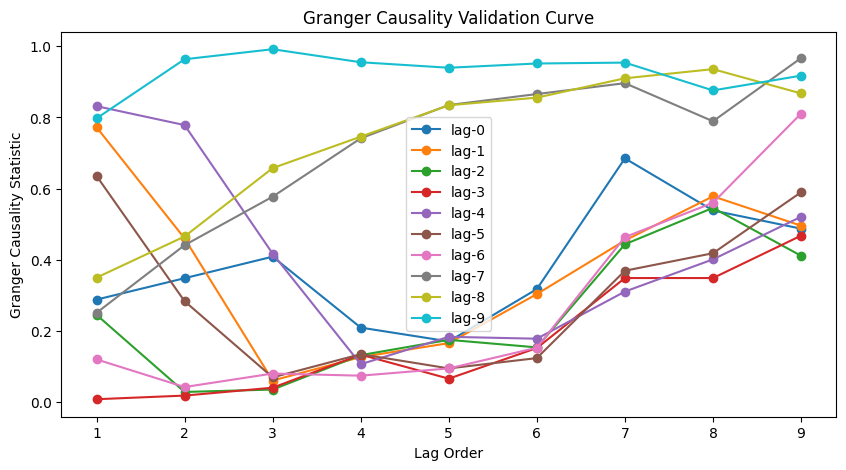

['log_return', 'diff'] {0: 0.1699363950261202, 1: 0.05985511214461379, 2: 0.027716178171240922, 3: 0.007253488045346085, 4: 0.10570825119025172, 5: 0.06874944856934395, 6: 0.04154320828365723, 7: 0.25027442027527014, 8: 0.3493199676975638, 9: 0.7973753448116668}

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2765  , p=0.5991  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=0.2772  , p=0.5985  , df=1
likelihood ratio test: chi2=0.2772  , p=0.5986  , df=1
parameter F test:         F=0.2765  , p=0.5991  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8524  , p=0.4267  , df_denom=1238, df_num=2
ssr based chi2 test:   chi2=1.7116  , p=0.4249  , df=2
likelihood ratio test: chi2=1.7104  , p=0.4252  , df=2
parameter F test:         F=0.8524  , p=0.4267  , df_denom=1238, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7046  , p=0.1642  , df_denom=1235, df_num=3
ssr based

C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['metrics_return'] = np.log(data['metrics']) - np.log(data['metrics'].shift(1))
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['value_return'] = np.log(data['value']) - np.log(data['value'].shift(1))
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy 

ssr based F test:         F=1.1562  , p=0.3227  , df_denom=1220, df_num=8
ssr based chi2 test:   chi2=9.3781  , p=0.3114  , df=8
likelihood ratio test: chi2=9.3428  , p=0.3142  , df=8
parameter F test:         F=1.1562  , p=0.3227  , df_denom=1220, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=0.9844  , p=0.4509  , df_denom=1217, df_num=9
ssr based chi2 test:   chi2=8.9982  , p=0.4374  , df=9
likelihood ratio test: chi2=8.9656  , p=0.4405  , df=9
parameter F test:         F=0.9844  , p=0.4509  , df_denom=1217, df_num=9

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.5285  , p=0.1121  , df_denom=1241, df_num=1
ssr based chi2 test:   chi2=2.5346  , p=0.1114  , df=1
likelihood ratio test: chi2=2.5320  , p=0.1116  , df=1
parameter F test:         F=2.5285  , p=0.1121  , df_denom=1241, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3909  , p=0.0920  , df_denom=1238, df_num=2
ssr based chi2

C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['metrics_return'] = np.log(data['metrics']) - np.log(data['metrics'].shift(1))
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['value_return'] = np.log(data['value']) - np.log(data['value'].shift(1))
C:\Users\67093\AppData\Local\Temp\ipykernel_832\730664009.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy 

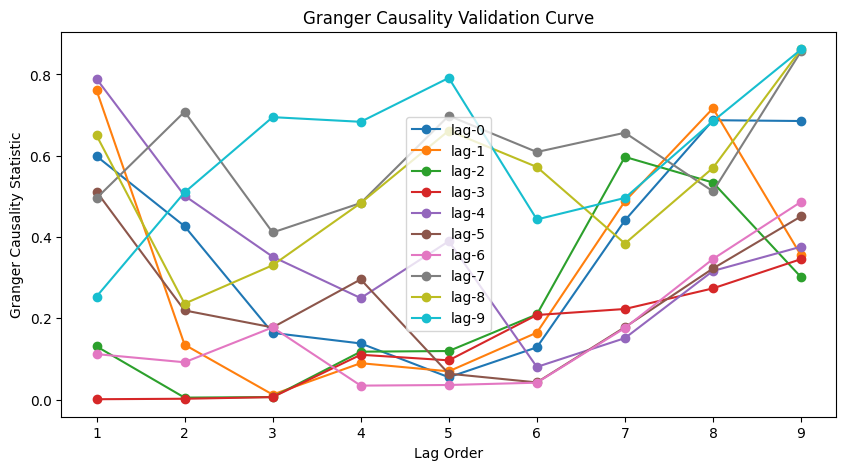

['log_return', 'log_return'] {0: 0.05510942898351875, 1: 0.01248978343838128, 2: 0.004975699677204944, 3: 0.0010410513993026579, 4: 0.08045250678914713, 5: 0.04238734059582179, 6: 0.03450387742274495, 7: 0.4113001388196015, 8: 0.23614340525940422, 9: 0.25358659028335606}


In [12]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

scaler = MinMaxScaler()
data = pd.read_csv('data/predict_model_data_0730.csv')

data['metrics'] =  data['pos'] - data['neg']
data['value'] = data['Close']

# window_size = 3 # 窗口大小
# data['metrics'] = data['metrics'].rolling(window_size).mean()



def show_test(data, lag,diff_type):


    
    data['metrics'] = data['metrics'].shift(lag)
    
    # window_size = 3 # 窗口大小
    # data['metrics'] = data['metrics'].rolling(window_size).mean()
    # data[['metrics']]= scaler.fit_transform(data[['metrics']])
    # data['metrics_return'] = data['metrics'].pct_change()
    # data = data[data['metrics_return'] < 9999]

    # data['value_return'] = data['value'].pct_change()
    # data['value_return'] = np.log(data['value']) - np.log(data['value'].shift(1))
    # data = data[data['value_return'] < 9999]


    if diff_type[0] == 'pct_change':
        data[['metrics']]= scaler.fit_transform(data[['metrics']])
        data['metrics_return'] = data['metrics'].pct_change()
    elif diff_type[0] == 'diff':
        data['metrics_return'] = data['metrics'].diff()
    elif diff_type[0] == 'log_return':
        data[['metrics']]= scaler.fit_transform(data[['metrics']])
        data = data[data['metrics']!=0]
        data['metrics_return'] = np.log(data['metrics']) - np.log(data['metrics'].shift(1))

    if diff_type[1] == 'pct_change':
        data['value_return'] = data['value'].pct_change()
    elif diff_type[1] == 'log_return':
        data['value_return'] = np.log(data['value']) - np.log(data['value'].shift(1))
    elif diff_type[1] == 'diff':
        data['value_return'] = data['value'].diff()




    start = '2020-01-02'
    end = '2023-05-30'
    data['date'] = pd.to_datetime(data['date'])
    data = data[(data['date']>= pd.Timestamp(start)) & (data['date'] <= pd.Timestamp(end))]

    # print(data)

    source = 'metrics_return'
    target = 'value_return'

    print(data[source].corr(data[target]))

    # 创建空的列表来存储结果
    results = []

    # print(len(data[source]))

    # 尝试不同的滞后阶数并执行格兰杰因果性分析
    for lag2 in range(1, 10):
        result = grangercausalitytests(data[[target, source]], maxlag=[lag2])
        # result = grangercausalitytests(data[[source, target]], maxlag=[lag])
        # print(result)
        results.append(result[lag2][0]['ssr_ftest'][1])

    # 绘制验证曲线


    # print(min(results))
    lags = np.arange(1, 10)
    

    # print(results)
    return lags, results
    




# result_map = {}

# plt.figure(figsize=(10, 5))
# for lag in range(10):
#     lags, results = show_test(data.copy(), lag, ['pct_change','log_return'])
#     plt.plot(lags, results, marker='o',label=f'lag-{lag}')
#     result_map[lag] = min(results)
# plt.xlabel('Lag Order')
# plt.ylabel('Granger Causality Statistic')
# plt.title('Granger Causality Validation Curve')
# plt.legend()
# plt.show()
# print(result_map)

for diff_type1 in ['pct_change','diff','log_return']:
    for diff_type2 in ['pct_change','diff','log_return']:
        diff_type = []
        diff_type.append(diff_type1)
        diff_type.append(diff_type2)
        result_map = {}
        plt.figure(figsize=(10, 5))
        for lag in range(5):
            lags, results = show_test(data.copy(), lag, diff_type)
            plt.plot(lags, results, marker='o',label=f'lag-{lag}')
            result_map[lag] = min(results)


        plt.xlabel('Lag Order')
        plt.ylabel('Granger Causality Statistic')
        plt.title('Granger Causality Validation Curve')
        plt.legend()
        plt.show()

        print(diff_type, result_map)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

scaler = MinMaxScaler()
data = pd.read_csv('data/predict_model_data.csv')

index = pd.read_csv('data/Fear_and_Greed_Index.csv')

# print(index)

data = pd.merge(data,index,left_on='date',right_on='timestamp')

# print(data['Close'].corr(data['value']))

data['metrics'] =  data['pos'] - data['neg']
# data['metrics'] =  data['value']
data['price'] = data['Close']

# window_size = 3 # 窗口大小
# data['metrics'] = data['metrics'].rolling(window_size).mean()



def show_test(data, lag):


    data[['metrics']]= scaler.fit_transform(data[['metrics']])
    data['metrics'] = data['metrics'].shift(lag)
    
    # window_size = 5 # 窗口大小
    # data['metrics'] = data['metrics'].rolling(window_size).mean()

    data['metrics_return'] = data['metrics'].pct_change()
    data = data[data['metrics_return'] < 9999]
    data['price_return'] = data['price'].pct_change()
    data = data[data['price_return'] < 9999]


    start = '2020-01-02'
    end = '2023-05-30'
    data['date'] = pd.to_datetime(data['date'])
    data = data[(data['date']>= pd.Timestamp(start)) & (data['date'] <= pd.Timestamp(end))]

    # print(data)

    source = 'metrics_return'
    target = 'price_return'

    print(lag, data[source].corr(data[target]))

    # 创建空的列表来存储结果
    results = []

    # print(len(data[source]))

    # 尝试不同的滞后阶数并执行格兰杰因果性分析

    max = 30

    for lag in range(1, max):
        result = grangercausalitytests(data[[target, source]], maxlag=[lag])
        # result = grangercausalitytests(data[[source, target]], maxlag=[lag])
        # print(result)
        results.append(result[lag][0]['ssr_ftest'][1])
        pass

    # 绘制验证曲线


    # print(min(results))
    lags = np.arange(1, max)
    

    # print(results)
    return lags, results
    

plt.figure(figsize=(10, 5))


result_map = {}



for lag in range(10):
    lags, results = show_test(data.copy(), lag)
    plt.plot(lags, results, marker='o',label=f'lag-{lag}')
    result_map[lag] = min(results)


plt.xlabel('Lag Order')
plt.ylabel('Granger Causality Statistic')
plt.title('Granger Causality Validation Curve')
plt.legend()
plt.show()

print(result_map)
